<a href="https://colab.research.google.com/github/Saadahm/Saadahm1/blob/main/Linear_Regression_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('NFLX.csv')

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02
mean,180.040778,187.655279,173.532019,180.929674,180.929674,8.734732e+07
std,162.861814,169.513468,157.218526,163.353438,163.353438,8.678611e+07
min,7.791429,8.262857,7.544286,7.701429,7.701429,3.123969e+06
25%,47.545714,49.742143,45.621429,47.712857,47.712857,3.264995e+07
50%,107.480003,115.419998,101.209999,108.379997,108.379997,6.049690e+07
75%,318.989990,336.199997,305.770005,325.039994,325.039994,1.139114e+08
max,567.979980,593.289978,543.000000,565.169983,565.169983,7.136955e+08


In [4]:
df['Date']=pd.to_datetime(df.Date)

In [5]:
df.shape

(523, 7)

In [6]:
df.drop('Adj Close',axis=1,inplace = True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2011-06-13,37.111427,37.571430,34.894287,35.095715,134741600
1,2011-06-20,34.551430,37.264286,34.302856,36.708572,133948500
2,2011-06-27,36.414288,38.391430,35.948570,38.284286,103798100
3,2011-07-04,39.428570,42.478573,39.387142,42.162857,143000200
4,2011-07-11,42.118572,43.541428,40.231430,40.990002,191842700


In [8]:
x=df[['Open','High','Low','Volume']]
y=df['Close']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [10]:
x_train.shape

(392, 4)

In [11]:
x_test.shape

(131, 4)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [13]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(regressor.coef_)

[-5.97017183e-01  7.39741957e-01  8.57824385e-01 -3.13296733e-09]


In [15]:
print(regressor.intercept_)

0.9290613159432723


In [16]:
predicted=regressor.predict(x_test)

In [ ]:
print(x_test)

          Open       High        Low      Volume
15   14.280714  14.616071  13.613571  3073739200
78   18.750000  19.627144  18.056429  3344812800
137  19.645357  19.814285  17.626785  3266510800
264  23.847500  24.222500  23.592501   450824000
113  16.316429  18.008928  16.308214  2855347600
..         ...        ...        ...         ...
71   21.872143  22.692142  21.107143  3487162000
473  92.500000  96.317497  92.467499   564072000
6    13.941071  14.446429  13.714286  2952331200
8    12.917500  13.558571  12.607857  4376019200
319  37.645000  38.497501  36.825001   423272400

[131 rows x 4 columns]


In [17]:
predicted.shape

(131,)

In [18]:
dframe=pd.DataFrame(y_test,predicted)


In [19]:
dfr=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})

In [20]:
print(dfr)

     Actual Price  Predicted Price
15      16.181429        15.731990
78      13.328571        13.499365
137     58.475716        56.420590
264     97.059998        98.749446
113     36.981430        37.764514
..            ...              ...
71       9.940000         8.813738
473    548.729980       536.546867
6       37.998569        37.235421
8       34.857143        34.227373
319    184.039993       182.777319

[131 rows x 2 columns]


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [22]:
regressor.score(x_test,y_test)

0.999170332323922

In [23]:
import math

In [24]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 2.949728427266824


In [25]:
print('Mean Square Error:',metrics.mean_squared_error(y_test,predicted))

Mean Square Error: 20.140292054569116


In [26]:
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

Root Mean Absolute Error: 1.7174773440330513


In [27]:
graph=dfr.head(30)

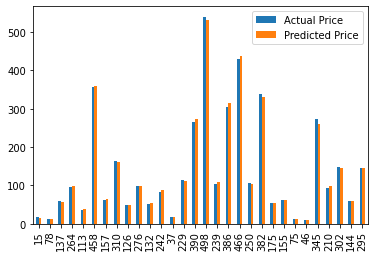

In [28]:
graph.plot(kind='bar')